In [19]:
import glob
from itertools import chain
import os
import pickle
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import spacy

sys.path.append("../../../")
from config.label_matchers import matchers

### Load the data:

In [2]:
def read_text_files_from_folder(folder_path):
    text_data = []
    # Use glob to find all .txt files in the specified folder
    for file_path in glob.glob(os.path.join(folder_path, "*.txt")):
        with open(file_path, "r", encoding="utf-8") as file:
            # Read each file and append its content to the list
            text_data.append(file.read())
    return text_data

In [3]:
train_reqs = read_text_files_from_folder("./Train_P1")
test_reqs = read_text_files_from_folder("./Test_P2")

In [4]:
print("Number of requirements in the train folder:", len(train_reqs))
print("Number of requirements in the test folder:", len(test_reqs))

Number of requirements in the train folder: 20
Number of requirements in the test folder: 20


### Transform the data: Tokenization + POS

In [5]:
analyzer = spacy.load("en_core_web_trf")

/root/envs/senlp/lib/python3.12/site-packages/thinc/shims/pytorch.py:253: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(filelike, map_locati

In [6]:
def extract(doc):
    tokens = [[token.text, token.pos_] for token in doc]
    return tokens

train_reqs_pos = [
    extract(analyzer(sentence))
    for sentence
    in train_reqs
]

test_reqs_pos = [
    extract(analyzer(sentence))
    for sentence
    in test_reqs
]

/root/envs/senlp/lib/python3.12/site-packages/thinc/shims/pytorch.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self._mixed_precision):


In [7]:
train_reqs_pos[1]

[['1.0', 'NUM'],
 ['SCOPE', 'NOUN'],
 ['\n', 'SPACE'],
 ['This', 'PRON'],
 ['Software', 'PROPN'],
 ['Requirements', 'PROPN'],
 ['Specification', 'PROPN'],
 ['(', 'PUNCT'],
 ['SRS', 'PROPN'],
 [')', 'PUNCT'],
 ['provides', 'VERB'],
 ['the', 'DET'],
 ['requirements', 'NOUN'],
 ['for', 'ADP'],
 ['the', 'DET'],
 ['Center', 'PROPN'],
 ['-', 'PUNCT'],
 ['to-', 'ADP'],
 ['Center', 'PROPN'],
 ['Communications', 'PROPN'],
 ['(', 'PUNCT'],
 ['C2C', 'PROPN'],
 [')', 'PUNCT'],
 ['Communications', 'PROPN'],
 ['project', 'NOUN'],
 ['.', 'PUNCT'],
 ['\n', 'SPACE'],
 ['1.1', 'NUM'],
 ['Identification', 'NOUN'],
 ['\n', 'SPACE'],
 ['1.2', 'NUM'],
 ['System', 'NOUN'],
 ['Overview', 'NOUN'],
 ['\n', 'SPACE'],
 ['This', 'DET'],
 ['document', 'NOUN'],
 ['describes', 'VERB'],
 ['the', 'DET'],
 ['requirements', 'NOUN'],
 ['for', 'ADP'],
 ['the', 'DET'],
 ['Dallas', 'PROPN'],
 ['/', 'SYM'],
 ['Ft', 'PROPN'],
 ['.', 'PROPN'],
 ['Worth', 'PROPN'],
 ['(', 'PUNCT'],
 ['DFW', 'PROPN'],
 [')', 'PUNCT'],
 ['Regional

In [8]:
test_reqs_pos[1]

[['1', 'X'],
 ['.', 'PUNCT'],
 ['Introduction', 'NOUN'],
 ['\n', 'SPACE'],
 ['1.1', 'X'],
 ['.', 'PUNCT'],
 ['Purpose', 'NOUN'],
 ['\n', 'SPACE'],
 ['This', 'DET'],
 ['document', 'NOUN'],
 ['defines', 'VERB'],
 ['the', 'DET'],
 ['application', 'NOUN'],
 ['software', 'NOUN'],
 ['requirements', 'NOUN'],
 ['for', 'ADP'],
 ['the', 'DET'],
 ['Interstate', 'PROPN'],
 ['-15', 'NUM'],
 ['Reversible', 'PROPN'],
 ['Lane', 'PROPN'],
 ['Control', 'PROPN'],
 ['System', 'PROPN'],
 ['(', 'PUNCT'],
 ['I-15', 'PROPN'],
 ['RLCS', 'PROPN'],
 [')', 'PUNCT'],
 ['.', 'PUNCT'],
 ['\n', 'SPACE'],
 ['The', 'DET'],
 ['RLCS', 'PROPN'],
 ['application', 'NOUN'],
 ['software', 'NOUN'],
 ['(', 'PUNCT'],
 ['‘', 'PUNCT'],
 ['RLCS', 'PROPN'],
 ['Application', 'PROPN'],
 ['’', 'PUNCT'],
 [')', 'PUNCT'],
 ['will', 'AUX'],
 ['meet', 'VERB'],
 ['all', 'PRON'],
 ['of', 'ADP'],
 ['the', 'DET'],
 ['software', 'NOUN'],
 ['requirements', 'NOUN'],
 ['listed', 'VERB'],
 ['in', 'ADP'],
 ['this', 'DET'],
 ['document', 'NOUN'],
 ['

### Clean the data:

In [9]:
print("Number of empty requirements in the train dataset:", len([1 for sent in train_reqs_pos if len(sent) == 0]))
print("Number of empty requirements in the test dataset:", len([1 for sent in test_reqs_pos if len(sent) == 0]))

Number of empty requirements in the train dataset: 0
Number of empty requirements in the test dataset: 0


In [10]:
train_reqs_df = pd.Series([" ".join([word[0] for word in sent]) for sent in train_reqs_pos])
test_reqs_df = pd.Series([" ".join([word[0] for word in sent]) for sent in test_reqs_pos])

In [11]:
print(f"Number of duplicated requirements in the train dataset: {train_reqs_df.duplicated().sum()} ({train_reqs_df.duplicated().sum()/train_reqs_df.shape[0]:.2%})")
print(f"Number of duplicated requirements in the test dataset: {test_reqs_df.duplicated().sum()} ({test_reqs_df.duplicated().sum()/test_reqs_df.shape[0]:.2%})")

Number of duplicated requirements in the train dataset: 0 (0.00%)
Number of duplicated requirements in the test dataset: 0 (0.00%)


### Analyze distributions:

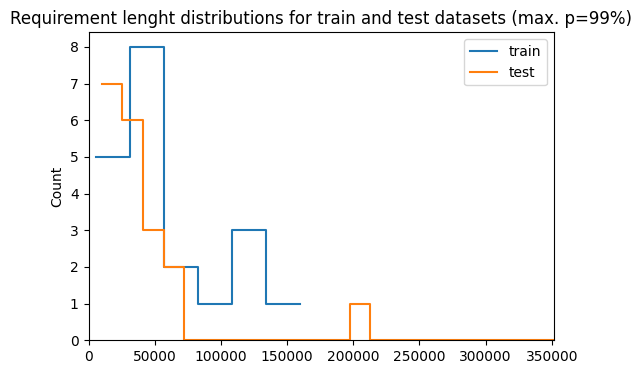

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot([len(req) for req in train_reqs_df], element="step", fill=False)
sns.histplot([len(req) for req in test_reqs_df], element="step", fill=False)
plt.xlim([
    0,
    pd.Series([len(req) for req in train_reqs_df] + [len(req) for req in test_reqs_df]).quantile(.99)
])
plt.legend(labels=["train", "test"])
plt.title("Requirement lenght distributions for train and test datasets (max. p=99%)")
plt.show()

In [13]:
pd.Series(list(chain(*[[word[1] for word in req] for req in train_reqs_pos]))).value_counts(dropna=False, normalize=True).round(3)

NOUN     0.249
PUNCT    0.122
DET      0.102
VERB     0.098
ADP      0.084
PROPN    0.061
AUX      0.055
SPACE    0.052
ADJ      0.051
NUM      0.029
CCONJ    0.023
PRON     0.018
PART     0.018
ADV      0.015
SCONJ    0.012
X        0.010
SYM      0.002
INTJ     0.000
Name: proportion, dtype: float64

In [14]:
pd.Series(list(chain(*[[word[1] for word in req] for req in test_reqs_pos]))).value_counts(dropna=False, normalize=True).round(3)

NOUN     0.250
PROPN    0.116
PUNCT    0.113
DET      0.091
VERB     0.083
ADP      0.082
SPACE    0.062
ADJ      0.053
AUX      0.045
CCONJ    0.026
NUM      0.020
PART     0.016
ADV      0.011
PRON     0.011
SCONJ    0.010
X        0.008
SYM      0.004
INTJ     0.000
Name: proportion, dtype: float64

In [15]:
df = pd.DataFrame(list(chain(*(train_reqs_pos + test_reqs_pos))), columns=["token", "pos"])
verbs_df = df.loc[df["pos"] == "VERB"]
print("Number of unique verbs:", verbs_df["token"].nunique())

Number of unique verbs: 3502


In [16]:
verbs_df["token"].value_counts(dropna=False, normalize=True).round(3)

token
provide        0.021
allow          0.016
have           0.015
used           0.013
based          0.010
               ...  
iterates       0.000
Invalidated    0.000
iterate        0.000
Consists       0.000
hope           0.000
Name: proportion, Length: 3502, dtype: float64

### Persist datasets:

In [17]:
all_reqs = train_reqs_pos + test_reqs_pos

In [21]:
label_names = matchers["requirement_completion"]

for req in all_reqs:
    for token in req:
        token[1] = label_names.index(token[1])

In [22]:
with open("./requirement_completion.pkl", "wb") as file:
    pickle.dump(all_reqs, file)

In [23]:
print("Number of requirements in the persisted dataset:", len(all_reqs))

Number of requirements in the persisted dataset: 40


In [24]:
# Deserialize the object from the binary file
with open("./requirement_completion.pkl", "rb") as file:
    loaded_data = pickle.load(file)

In [25]:
loaded_data[0]

[['1', 17],
 ['Introduction', 7],
 ['\n', 14],
 ['1.1', 17],
 ['Purpose', 7],
 ['\n', 14],
 ['The', 5],
 ['primary', 0],
 ['goal', 7],
 ['of', 1],
 ['this', 5],
 ['document', 7],
 ['is', 3],
 ['to', 9],
 ['provide', 16],
 ['a', 5],
 ['complete', 0],
 ['and', 4],
 ['accurate', 0],
 ['list', 7],
 ['of', 1],
 ['requirements', 7],
 ['for', 1],
 ['the', 5],
 ['EVLA', 11],
 ['Correlator', 11],
 ['Backend', 11],
 ['System', 11],
 ['.', 12],
 ['Upon', 13],
 ['completion', 7],
 [',', 12],
 ['the', 5],
 ['document', 7],
 ['will', 3],
 ['act', 16],
 ['as', 1],
 ['a', 5],
 ['binding', 16],
 ['contract', 7],
 ['between', 1],
 ['developers', 7],
 ['and', 4],
 ['users', 7],
 ['and', 4],
 ['will', 3],
 ['provide', 16],
 ['a', 5],
 ['common', 0],
 ['point', 7],
 ['of', 1],
 ['reference', 7],
 ['for', 1],
 ['system', 7],
 ['expectations', 7],
 ['.', 12],
 ['\n', 14],
 ['The', 5],
 ['primary', 0],
 ['audience', 7],
 ['of', 1],
 ['this', 5],
 ['document', 7],
 ['includes', 16],
 [',', 12],
 ['but', 4],
 [